In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gym
import numpy as np
import os

/home/raphael/rl_introduction/venv/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# baselines framework
see code:
- https://github.com/openai/baselines
- https://github.com/hill-a/stable-baselines

And doc:
- https://stable-baselines.readthedocs.io/en/master/index.html

Pre-trained agent:
- https://github.com/araffin/rl-baselines-zoo

### Train, Save, Load (Example DQN): 

In [7]:
import gym

from stable_baselines import DQN
from stable_baselines.common.evaluation import evaluate_policy


# Create environment
env = gym.make('LunarLander-v2')

# Instantiate the agent
model = DQN('MlpPolicy', env, learning_rate=1e-3, prioritized_replay=True, verbose=1)
# Train the agent
model.learn(total_timesteps=int(2e5))
# Save the agent
model.save("dqn_lunar")
del model  # delete trained model to demonstrate loading


--------------------------------------
| % time spent exploring  | 23       |
| episodes                | 100      |
| mean 100 episode reward | -110     |
| steps                   | 15599    |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 200      |
| mean 100 episode reward | -7.2     |
| steps                   | 92830    |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 300      |
| mean 100 episode reward | 47.9     |
| steps                   | 121298   |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 400      |
| mean 100 episode reward | 193      |
| steps                   | 153832   |
--------------------------------------
--------------------------------------
| % time spent exploring 

AttributeError: 'NoneType' object has no attribute 'reset'

In [25]:
# Load the trained agent
model = DQN.load("dqn_lunar")

# Evaluate the agent
mean_reward, n_steps = evaluate_policy(model, env, n_eval_episodes=10)

# Enjoy trained agent
obs = env.reset()
for i in range(1000):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()
env.close()

Loading a model without an environment, this model cannot be trained until it has a valid environment.


### Hyper parameters:

In [11]:
from stable_baselines import DQN, A2C
import tensorflow as tf

#### The policy:

You can use available policies 'MlpPolicy' (fully connected), 'CnnPolicy' (convolutional) and configure them. For example:
- 3 layers of 32, 16, 8 neurons for dqn

In [20]:
policy_kwargs = dict(act_fun=tf.nn.relu, layers=[32, 16, 8])
model = DQN('MlpPolicy', env, policy_kwargs=policy_kwargs)
model.learn(total_timesteps=500)

- 1 share layer of 64 neurons
- 2 specifics layers od 32, 16 neurons for policy model
- 3 specifics layers of 64, 16, 16 neurons for value function model

In [21]:
policy_kwargs = dict(act_fun=tf.nn.tanh, net_arch=[64, dict(pi=[32, 16],
                                                          vf=[64, 16, 16])])
model = A2C('MlpPolicy', env, policy_kwargs=policy_kwargs)
model.learn(total_timesteps=500)

#### Specific parameters of algorithms

For example for DQN:
- buffer_size – (int) size of the replay buffer
- batch_size – (int) size of a batched sampled from replay buffer for training
- double_q – (bool) Whether to enable Double-Q learning or not.
- prioritized_replay – (bool) if True prioritized replay buffer will be used.
- learning_rate – (float) learning rate



In [22]:
model = DQN('MlpPolicy', env,
            learning_rate=0.0005,
            buffer_size=50000,
            batch_size=32,
            double_q=True)
model.learn(total_timesteps=500)

For example for A2C:
- n_steps – (int) The number of steps to run for each environment per update (i.e. batch size is n_steps * n_env where n_env is number of environment copies running in parallel)
- max_grad_norm – (float) The maximum value for the gradient clipping
- learning_rate – (float) The learning rate

In [24]:
model = A2C('MlpPolicy', env,
            learning_rate=0.0007,
            n_steps=5,
            max_grad_norm=0.5)
model.learn(total_timesteps=500)

### monitoring and benchmarks

In [26]:
from stable_baselines.ddpg.policies import LnMlpPolicy, MlpPolicy
from stable_baselines.bench import Monitor
from stable_baselines.results_plotter import load_results, ts2xy
from stable_baselines import DDPG, DQN
from stable_baselines.ddpg import AdaptiveParamNoiseSpec
from stable_baselines import results_plotter


#best_mean_reward, n_steps = -np.inf, 0
#
#def callback(_locals, _globals):
#    global n_steps, best_mean_reward
#    # Print stats every 1000 calls
#    if (n_steps + 1) % 1000 == 0:
#        # Evaluate policy training performance
#        x, y = ts2xy(load_results(log_dir), 'timesteps')
#        if len(x) > 0:
#            mean_reward = np.mean(y[-100:])
#            print(x[-1], 'timesteps')
#            print("Best mean reward: {:.2f} - Last mean reward per episode: {:.2f}".format(best_mean_reward, mean_reward))
#            # New best model, you could save the agent here
#            if mean_reward > best_mean_reward:
#                best_mean_reward = mean_reward
#                # Example for saving best model
#                print("Saving new best model")
#                _locals['self'].save(log_dir + 'best_model.pkl')
#    n_steps += 1
#    return True

In [63]:

from stable_baselines.deepq.policies import MlpPolicy
from stable_baselines import PPO2, DQN
# Create log dir
log_dir = "tmp/"
os.makedirs(log_dir, exist_ok=True)

# Create and wrap the environment
#env = gym.make('LunarLanderContinuous-v2')
env = gym.make('CartPole-v0')
env = Monitor(env, log_dir, allow_early_resets=True)

# Add some param noise for exploration
#param_noise = AdaptiveParamNoiseSpec(initial_stddev=0.1, desired_action_stddev=0.1)
# Because we use parameter noise, we should use a MlpPolicy with layer normalization
#model = DDPG(LnMlpPolicy, env, param_noise=param_noise, verbose=0)
model = DQN('MlpPolicy', env, verbose=0)


model.learn(total_timesteps=150000)# , callback=callback)

In [64]:
time_steps = 150000

In [65]:
import seaborn as sns
sns.set_style("darkgrid")

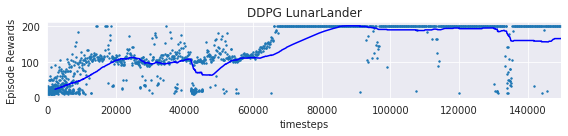

<Figure size 720x720 with 0 Axes>

In [66]:
results_plotter.plot_results([log_dir], time_steps, results_plotter.X_TIMESTEPS, "DDPG LunarLander")
plt.figure(figsize=(10,10))
plt.show()

In [67]:

obs = env.reset()
for i in range(1000):
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done is True:
        obs = env.reset()
    env.render()

env.close()

In [89]:
env_names = ['MountainCar-v0','CartPole-v1','LunarLander-v2']
algs = [A2C,DQN]
alg_names = ['a2c','dqn']
layers = [[32],[64,32],[64,32,16]]

In [90]:
time_steps = 1000

In [94]:
for env_name in env_names:
    for i,alg in enumerate(algs):
        print(alg_names[i])
        for l,layer in enumerate(layers):
            tf.reset_default_graph()
            
            log_dir= output_dir='tmp/'+alg_names[i]+'_'+env_name + '_' + str(len(layer))
            os.makedirs(log_dir, exist_ok=True) 
            
            env = gym.make(env_name)
            env = Monitor(env, log_dir, allow_early_resets=True)
            
            if alg_names[i] == 'dqn':
                policy_kwargs = dict(act_fun=tf.nn.relu, layers=layer)
            else:
                policy_kwargs = dict(act_fun=tf.nn.relu, net_arch=layer)
            
            model = alg('MlpPolicy', env, verbose=0, policy_kwargs=policy_kwargs)

            model.learn(total_timesteps=time_steps)# , callback=callback)

a2c
dqn
a2c
dqn
a2c
dqn


a2c
dqn
a2c
dqn
a2c
dqn


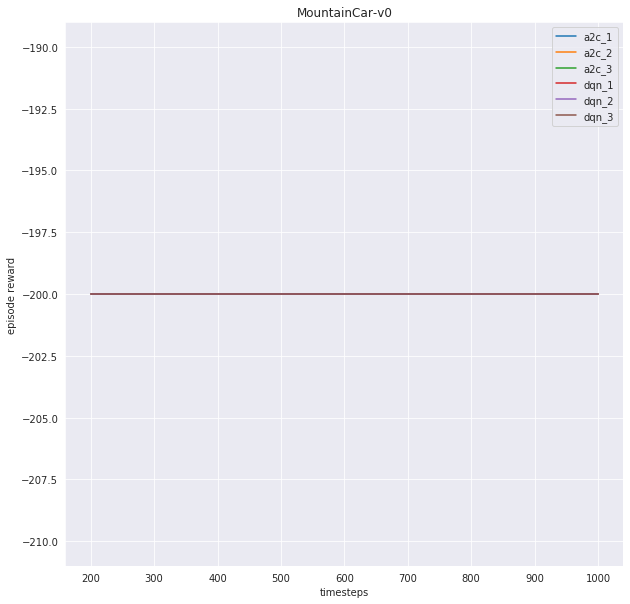

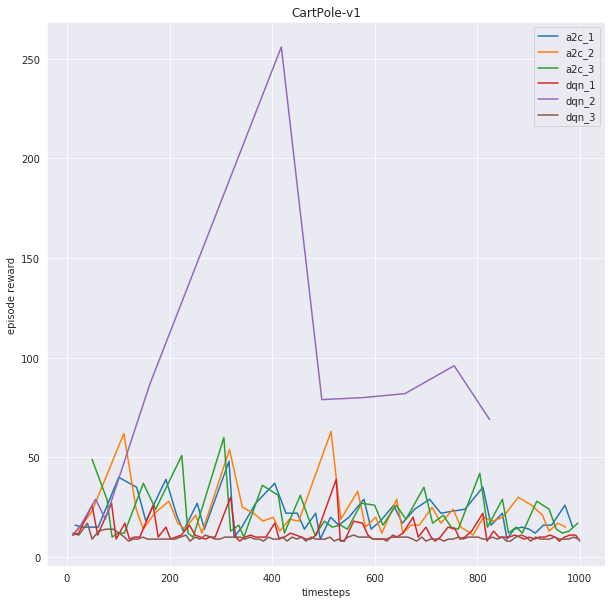

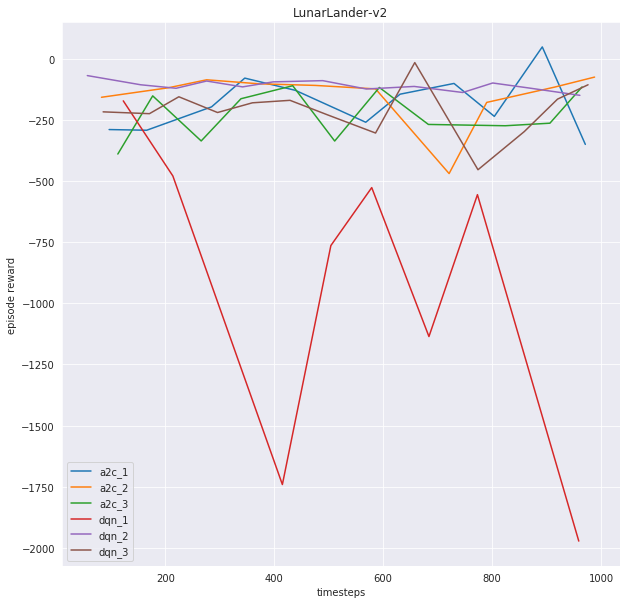

In [120]:
glob_res = {}
for env_name in env_names:
    fig,ax = plt.subplots(figsize=(10,10))
    glob_res['env_name'] = {}
    for i,alg in enumerate(algs):
        glob_res['env_name'][alg_names[i]] = {}
        print(alg_names[i])
        for l,layer in enumerate(layers):
            tf.reset_default_graph()

            log_dir= output_dir='tmp/'+alg_names[i]+'_'+env_name + '_' + str(len(layer))
            res = pd.read_csv(log_dir+'/monitor.csv', skiprows=1)
            ax.plot(res['l'].cumsum(), res['r'], label = alg_names[i]+ '_' + str(len(layer)))
            
            glob_res['env_name'][alg_names[i]][str(len(layer))] = res
    ax.set_xlabel('timesteps')
    ax.set_ylabel('episode reward')
    ax.set_title(env_name)
    ax.legend()

### Example of train with atari

In [ ]:
from stable_baselines.common.cmd_util import make_atari_env
from stable_baselines.common.vec_env import VecFrameStack
from stable_baselines import ACER

# There already exists an environment generator
# that will make and wrap atari environments correctly.
# Here we are also multiprocessing training (num_env=4 => 4 processes)
env = make_atari_env('PongNoFrameskip-v4', num_env=4, seed=0)
# Frame-stacking with 4 frames
env = VecFrameStack(env, n_stack=4)

model = ACER('CnnPolicy', env, verbose=1)
model.learn(total_timesteps=25000)

obs = env.reset()
while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()
env.close()

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
----------------------------------
| avg_norm_adj        | 0        |
| avg_norm_g          | 0.041    |
| avg_norm_grads_f    | 0.041    |
| avg_norm_k          | 2.45     |
| avg_norm_k_dot_g    | 0.041    |
| entropy             | 151      |
| explained_variance  | -0.134   |
| fps                 | 0        |
| loss                | -1.51    |
| loss_bc             | -0       |
| loss_f              | -0.0049  |
| loss_policy         | -0.0049  |
| loss_q              | 3.71e-05 |
| mean_episode_length | 0        |
| mean_episode_reward | 0        |
| norm_grads          | 0.0131   |
| norm_grads_policy   | 0.00804  |
| norm_grads_q        | 0.0103   |
| total_timesteps     | 0        |
----------------------------------
----------------------------------
| avg_norm_adj        | 0.179    |
| avg_norm_g          | 2        |
| avg_nor

### Some pre-trained model